In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For those using google colab
# from google.colab import files
# uploaded = files.upload()

In [3]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
# Printing the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
data.head(20)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
5,6,28.0,NaN,14.9,66,5,6,2010,66,C
6,7,23.0,299.0,8.6,65,5,7,2010,65,PS
7,8,19.0,99.0,13.8,59,5,8,2010,59,C
8,9,8.0,19.0,20.1,61,5,9,2010,61,PS
9,10,NaN,194.0,8.6,69,5,10,2010,69,S


#### Observations so far
- There are some Nan values
- Temp C and Temp are duplicate columns
- Month column data type is object (It should be integer)
- There is a redundant column namely "Unnamed 0"

In [7]:
# Print the dataframe attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [8]:
# Drop dupplicate column( "Temp C") and redundant column "Unnamed 0" 
# data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1, inplace = True)

data1 = data.drop(['Unnamed: 0',"Temp C"], axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [10]:
# Convert the Month column data type to float data type

data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [11]:
# Conver the weather to category data type
data1['Weather']=data1['Weather'].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      158 non-null    int64   
 5   Year     158 non-null    int64   
 6   Temp     158 non-null    int64   
 7   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.1 KB


#### Identifying Duplicate rows

In [13]:
# Print all duplicated rows
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [14]:
# Checking for duplicated rows in the table
#Print only the duplicated row (one) only
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [15]:
# Drop duplicated rows
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [16]:
# Reset the index column
data1.reset_index(drop=True, inplace = True)

#### Rename the columns

In [18]:
# Change column names (Rename the columns)
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


#### Impute the missing values

In [20]:
# Display data1 info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.0 KB


In [21]:
# Display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

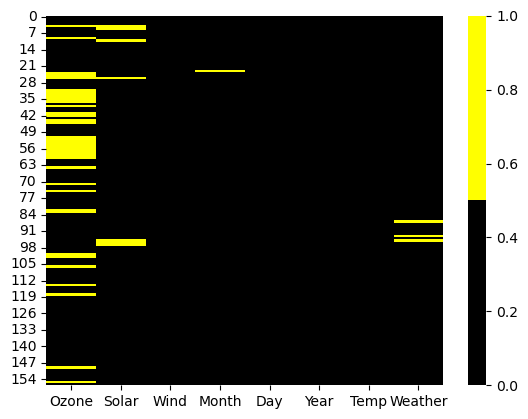

In [22]:
# Visualize data1 missing values using heat map

cols = data1.columns 
colors = ['black', 'yellow'] 
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)


In [23]:
data1["Ozone"]

0      41.0
1      36.0
2      12.0
3      18.0
4       NaN
       ... 
152    20.0
153    41.0
154    30.0
155     NaN
156    18.0
Name: Ozone, Length: 157, dtype: float64

In [24]:
# Find the mean and median values of each numeric column
#Imputation of missing value with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [25]:
# Replace the Ozone missing values with median value
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [26]:
# Find the mean and median values of each numeric column
#Imputation of missing value with median
median_Solar = data1["Solar"].median()
mean_Solar = data1["Solar"].mean()
print("Median of Solar: ", median_Solar)
print("Mean of Ozone: ", mean_Solar)

Median of Solar:  199.0
Mean of Ozone:  185.36666666666667


In [27]:
# Replace the Solar missing values with mean value
data1['Solar'] = data1['Solar'].fillna(mean_Solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [28]:
# print the data1 5 rows
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,31.0,185.366667,14.3,5.0,5,2010,56,S


In [29]:
# Find the mode values of categorical column (weather)
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [30]:
# Impute missing values (Replace NaN with  mode etc.) of "weather" using fillna()
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [31]:
# Impute missing values (Replace NaN with  mode etc.) of "month" using fillna()
mode_month = data1["Month"].mode()[0]
data1["Month"] = data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [32]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S
156,18.0,131.0,8.0,9.0,29,2010,76,C


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.0 KB


#### Detection of outliers in the columns

#### Method1: Using histograms and box plots

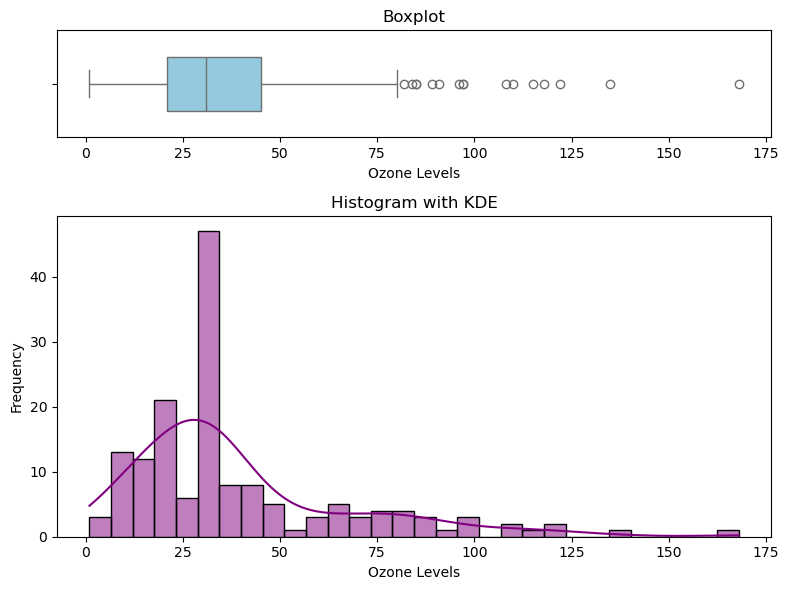

In [36]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Observations
- The ozone column has extreme values beyond 81 as seen from box plot
- The same is confirmed from the below right-skewed histogram

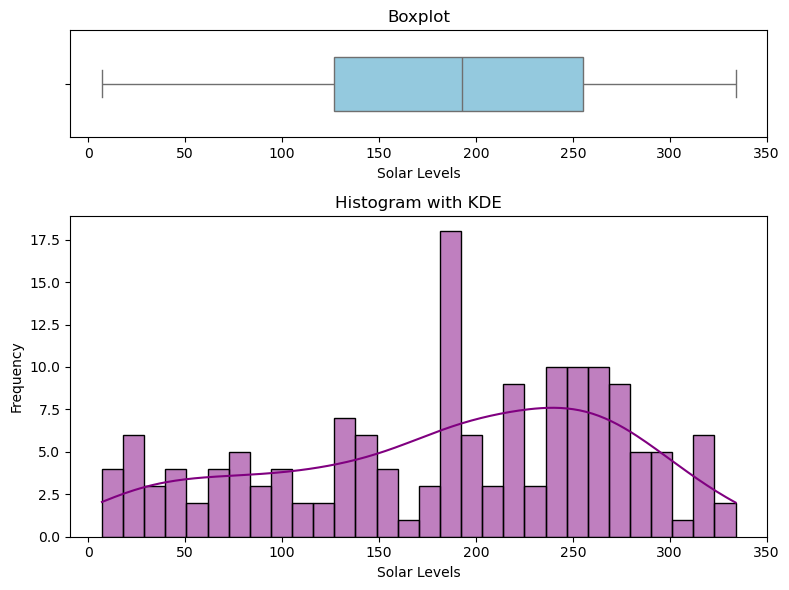

In [38]:
# Subplots for Solar column
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x234c14c7170>,
 'caps': [<matplotlib.lines.Line2D at 0x234c1971fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x234c14c6150>],
 'medians': [<matplotlib.lines.Line2D at 0x234c19725a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x234c19727e0>],
 'means': []}

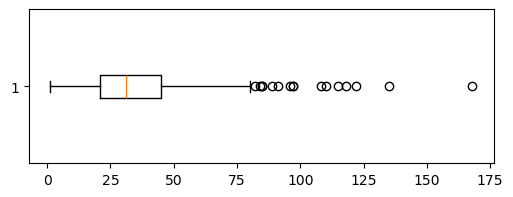

In [39]:
# Display boxplot for ozone

plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert= False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

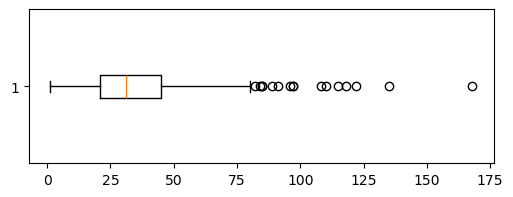

In [40]:
# Extract outliers from boxplot for Ozone column
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']] #fliers are outliers

#### Method 2 for outlier detection
- **Using mu +/- 3*sigma limits (Standard deviation method)**

In [42]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [43]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\shiva\AppData\Local\Temp\ipykernel_11564\3121128980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\shiva\AppData\Local\Temp\ipykernel_11564\3121128980.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


#### Observations
- It is observed that only two outliers are idenfied using std method
- In box plot method more no of outliers are identified
- This is because the assumption of normality is not
  satified in this column

### Some more visualizations in EDA
#### Quantile-Quantile plot for checking the normality of distribution and possible ouliers

Text(0.5, 0, 'Theoretical Quantiles')

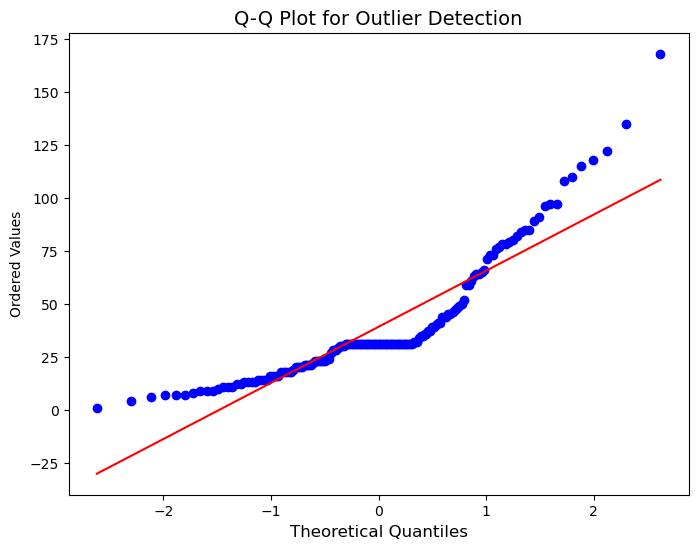

In [46]:
import scipy.stats as stats

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

#### Observations from Q-Q plot
- **The data does not follow normal distribution as the data points are deviating significantly away from the red line**
- **The data shows a right-skewed distribution and possible outliers**



#### Other visualisations that could help understand the data

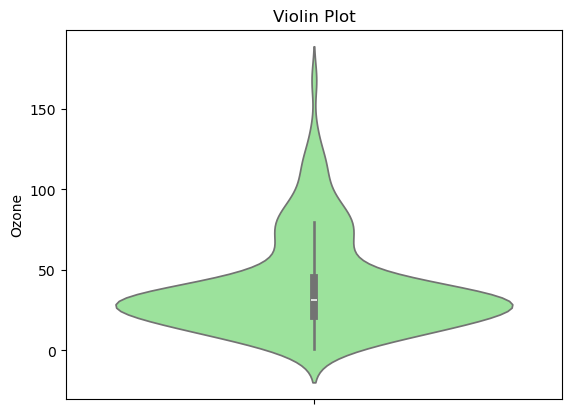

In [49]:
# Create a figure for violin plot

sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

# Show the plot
plt.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_11564\2085980294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "Weather", y="Ozone", palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

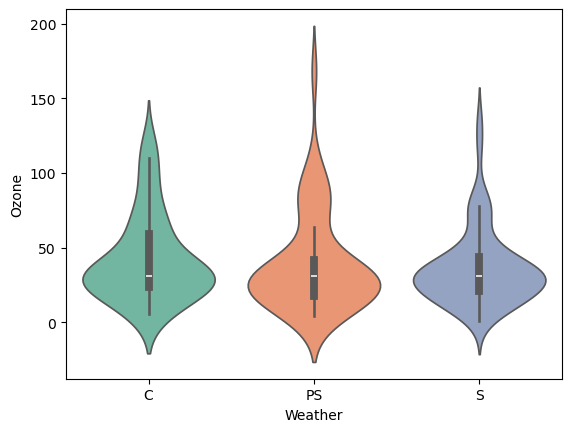

In [50]:
sns.violinplot(data=data1, x = "Weather", y="Ozone", palette="Set2")

C:\Users\shiva\AppData\Local\Temp\ipykernel_11564\945011545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

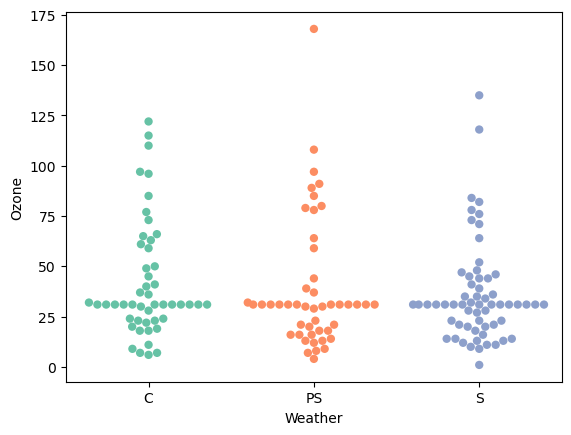

In [51]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


C:\Users\shiva\AppData\Local\Temp\ipykernel_11564\3820516026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)


<Axes: xlabel='Weather', ylabel='Ozone'>

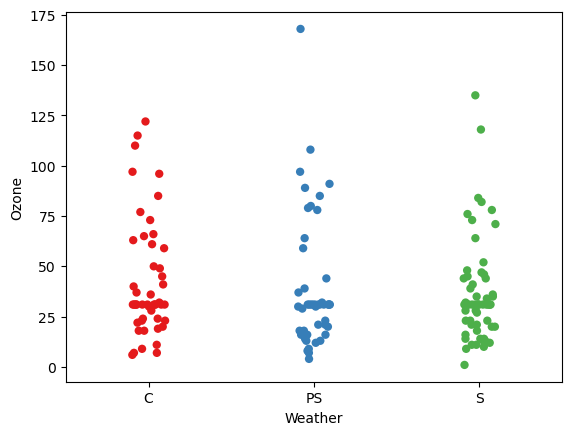

In [52]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)


<Axes: xlabel='Ozone', ylabel='Density'>

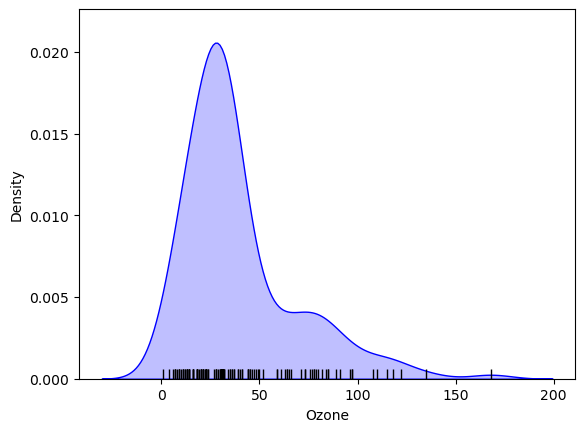

In [53]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")


<Axes: xlabel='Weather', ylabel='Ozone'>

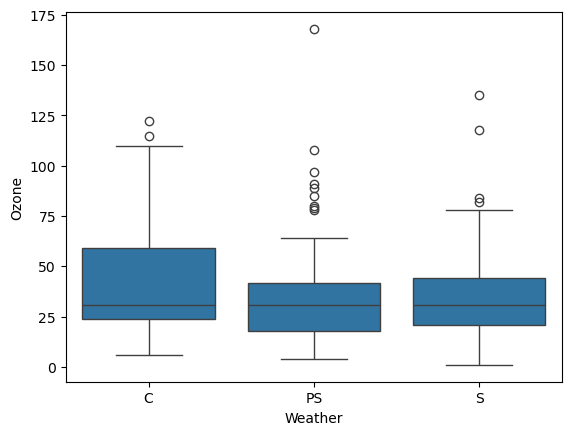

In [54]:
# Category wise boxplot for ozone
sns.boxplot(data = data1, x = "Weather", y="Ozone")

<Axes: xlabel='Weather', ylabel='Solar'>

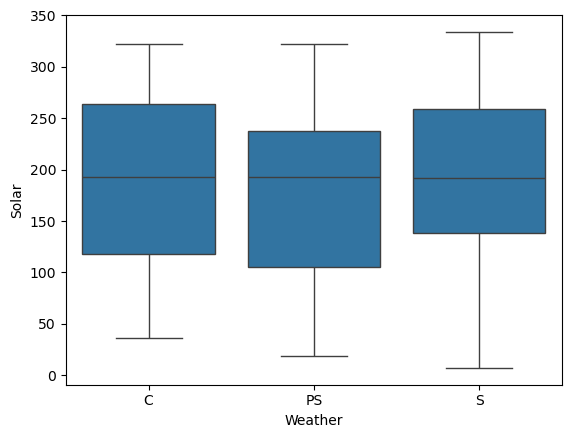

In [55]:
# # Category wise  for Solar
sns.boxplot(data = data1, x = "Weather", y="Solar")

#### Correlation coefficient and pair plots

In [57]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.0 KB


In [139]:
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,185.4,14.3,5.0,5,2010,56,S


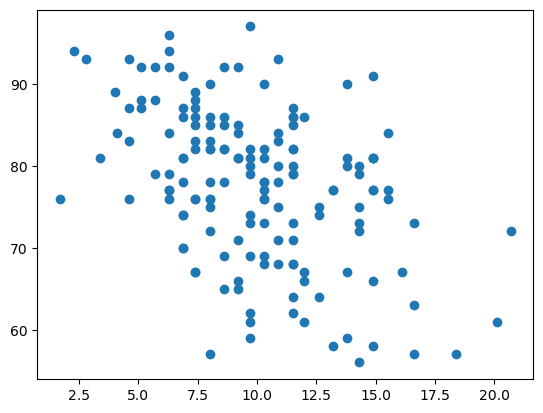

In [58]:
plt.scatter(data1["Wind"], data1["Temp"])

In [141]:
# Compute pearson correlation coefficient
#between Wind speed and Temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

#### Observation
- The correlation between wind and temp is observed to be negatively correlated with mild  strength

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.0 KB


In [62]:
# Read all numeric (continuous) columns into a new table data1_numeric
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77


### **What is the Correlation Coefficient?**
The **correlation coefficient** is a statistical measure that quantifies the strength and direction of the relationship between two variables. It ranges between **-1 and 1**, where:
- **1** indicates a perfect **positive correlation** (as one variable increases, the other also increases).
- **-1** indicates a perfect **negative correlation** (as one variable increases, the other decreases).
- **0** indicates **no correlation** (no linear relationship between the variables).

### **Pearson Correlation Coefficient (r)**
The **Pearson correlation coefficient** measures the **linear relationship** between two continuous variables.

#### **Formula:**
$
r = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}
$
Where:
-  r  = Pearson correlation coefficient
- $ x_i, y_i $ = Individual data points
- $ \bar{x}, \bar{y} $ = Mean of $\ x  $ and $ \ y $
- $ \sum  $= Summation over all data points

---

### **Interpretation of Pearson Correlation (r)**
| **r Value**  | **Strength of Correlation** |
|-------------|---------------------------|
| \( r = 1 \)  | Perfect Positive Correlation |
|$ \ 0.7 \leq r < 1  $ | Strong Positive Correlation |
| $\ 0.3 \leq r < 0.7 $  | Moderate Positive Correlation |
| \( 0 < r < 0.3 \)  | Weak Positive Correlation |
| \( r = 0 \)  | No Correlation |
| \( -0.3 < r < 0 \)  | Weak Negative Correlation |
| \( -0.7 < r \leq -0.3 \)  | Moderate Negative Correlation |
|$ \ -1 \leq r \leq -0.7  $ | Strong Negative Correlation |
| \( r = -1 \)  | Perfect Negative Correlation |


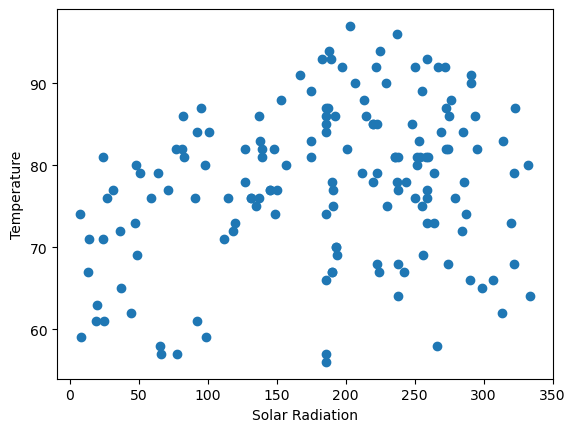

In [143]:
plt.xlabel("Solar Radiation")
plt.ylabel("Temperature")
plt.scatter(data1_numeric["Solar"],data1_numeric["Temp"])

In [145]:
# print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.297661,-0.523738,0.597087
Solar,0.297661,1.000000,-0.055874,0.260677
Wind,-0.523738,-0.055874,1.000000,-0.441228
Temp,0.597087,0.260677,-0.441228,1.000000


#### Observations
- The highest correlation strength is observed between Ozone and Temperature (0.597087)
- The next higher correlation strength is observed between Ozone and wind (-0.523738)
- The next higher correlation strength is observed between wind and Temp (-0.441228)
- The least correlation strength is observed between solar and wind (-0.055874)

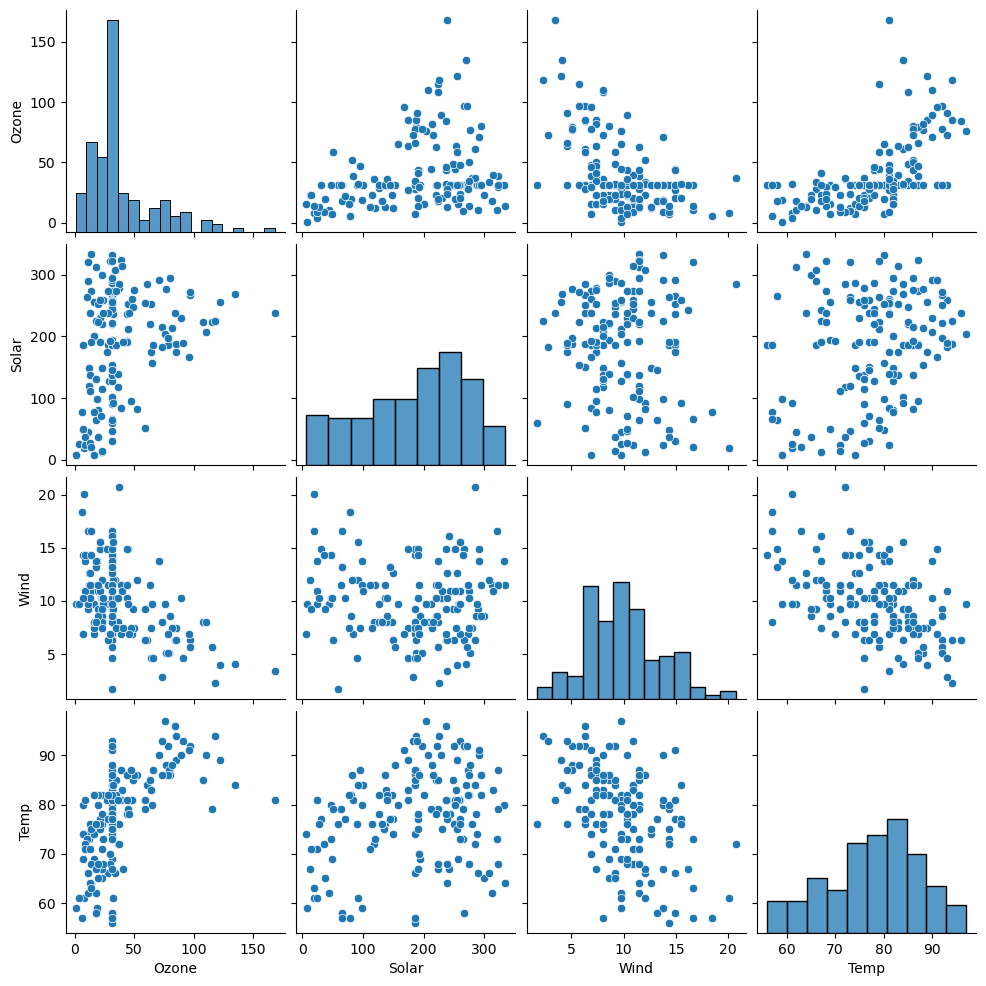

In [66]:
# Plot a pair plot between all numeric columns using seaborn
sns.pairplot(data1_numeric)

In [67]:
data1.to_csv("climate.csv")

In [68]:
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,31.0,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9.0,30,2010,68,S
153,41.0,190.000000,7.4,5.0,1,2010,67,C
154,30.0,193.000000,6.9,9.0,26,2010,70,PS
155,31.0,145.000000,13.2,9.0,27,2010,77,S


In [69]:
data1["Solar"]= np.round(data1["Solar"],1)

In [70]:
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,185.4,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


#### Transformations

In [72]:
#Creating dummy variable for Weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,185.4,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.0,13.2,27,2010,77,False,False,False,False,True,False,False,True


#### Normalization of the data

In [74]:
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77


In [75]:
data1_numeric.values

array([[ 41.        , 190.        ,   7.4       ,  67.        ],
       [ 36.        , 118.        ,   8.        ,  72.        ],
       [ 12.        , 149.        ,  12.6       ,  74.        ],
       [ 18.        , 313.        ,  11.5       ,  62.        ],
       [ 31.        , 185.36666667,  14.3       ,  56.        ],
       [ 28.        , 185.36666667,  14.9       ,  66.        ],
       [ 23.        , 299.        ,   8.6       ,  65.        ],
       [ 19.        ,  99.        ,  13.8       ,  59.        ],
       [  8.        ,  19.        ,  20.1       ,  61.        ],
       [ 31.        , 194.        ,   8.6       ,  69.        ],
       [  7.        , 185.36666667,   6.9       ,  74.        ],
       [ 16.        , 256.        ,   9.7       ,  69.        ],
       [ 11.        , 290.        ,   9.2       ,  66.        ],
       [ 14.        , 274.        ,  10.9       ,  68.        ],
       [ 18.        ,  65.        ,  13.2       ,  58.        ],
       [ 14.        , 334

In [76]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[0.24 0.56 0.3  0.27]
 [0.21 0.34 0.33 0.39]
 [0.07 0.43 0.57 0.44]
 [0.1  0.94 0.52 0.15]
 [0.18 0.55 0.66 0.  ]
 [0.16 0.55 0.69 0.24]
 [0.13 0.89 0.36 0.22]
 [0.11 0.28 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.57 0.36 0.32]]


In [77]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

array = data1_numeric.values
scaler = StandardScaler()
rescaledX = scaler.fit_transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[ 0.06  0.05 -0.72 -1.15]
 [-0.11 -0.78 -0.55 -0.61]
 [-0.95 -0.42  0.76 -0.4 ]
 [-0.74  1.47  0.45 -1.68]
 [-0.29  0.    1.25 -2.32]
 [-0.39  0.    1.42 -1.25]
 [-0.56  1.31 -0.38 -1.36]
 [-0.7  -1.    1.11 -2.  ]
 [-1.09 -1.92  2.91 -1.79]
 [-0.29  0.1  -0.38 -0.93]]
